In [79]:
from monai import transforms
from scripts.data import Centre2DDataset, load_2D_data
from scripts.utils import load_metadata
import matplotlib.pyplot as plt
from math import pi


def prepare_ax(ax, image, title, cmap=None):
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.axis("off")
    return ax


def plot_augmentations(images, labels, transform, title="Augmentations",n_examples=4):
    fig, ax = plt.subplots(2, 2*n_examples, figsize=(5*n_examples, 5))

    for i in range(2, n_examples+2):
        image = images[i]
        label = labels[i]
        fn_keys = {"img": image, "seg": label}

        transformed_keys = transform(fn_keys)
        ax[0, 0+(i-2)] = prepare_ax(ax[0, 2*(i-2)], image[0], title="Real image", cmap="gray")
        ax[0, 1+(i-2)] = prepare_ax(ax[0, 1+2*(i-2)] , label[0], title="Real segmentation")
        ax[1, 0+(i-2)] = prepare_ax(ax[1, 2*(i-2)] , transformed_keys["img"][0], title="Augmented image", cmap="gray")
        ax[1, 1+(i-2)] = prepare_ax(ax[1, 1+2*(i-2)] , transformed_keys["seg"][0], title="Augmented segmentation")

    # add a title
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
metadata = load_metadata()
load_transform = transforms.ScaleIntensity(minv=0.0, maxv=1.0, channel_wise=True)
images, labels, ps = load_2D_data(centre=1, metadata=metadata, transform=load_transform)

Loading Images for centre:  1
Loading Labels for centre:  1


100%|██████████| 95/95 [00:01<00:00, 56.09File/s]


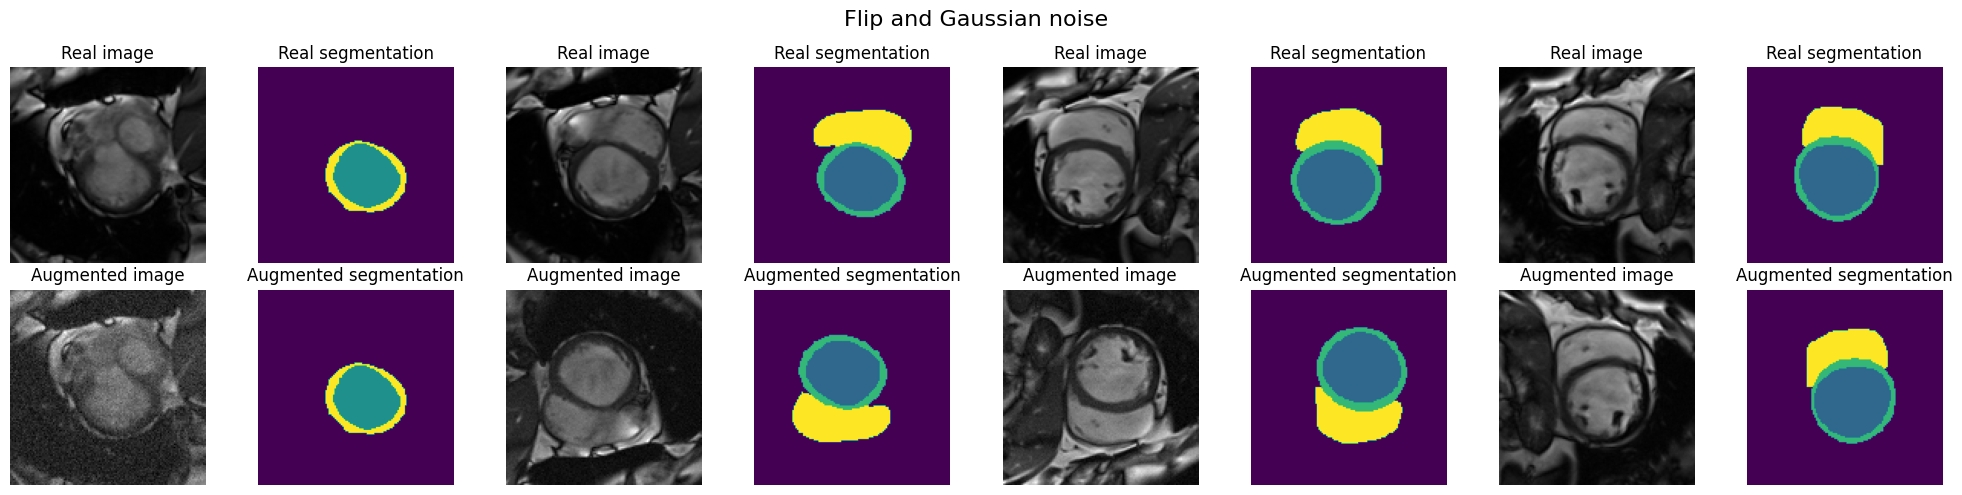

In [81]:

transform = transforms.Compose(
    [
        transforms.RandFlipd(keys=("img", "seg"), prob=0.5, spatial_axis=[1]),
        transforms.RandFlipd(keys=("img", "seg"), prob=0.5, spatial_axis=[0]),
        transforms.RandGaussianNoised(keys=("img",), prob=1, mean=0, std=0.05),
    ]
)

plot_augmentations(images, labels, transform=transform, title="Flip and Gaussian noise",n_examples=4)

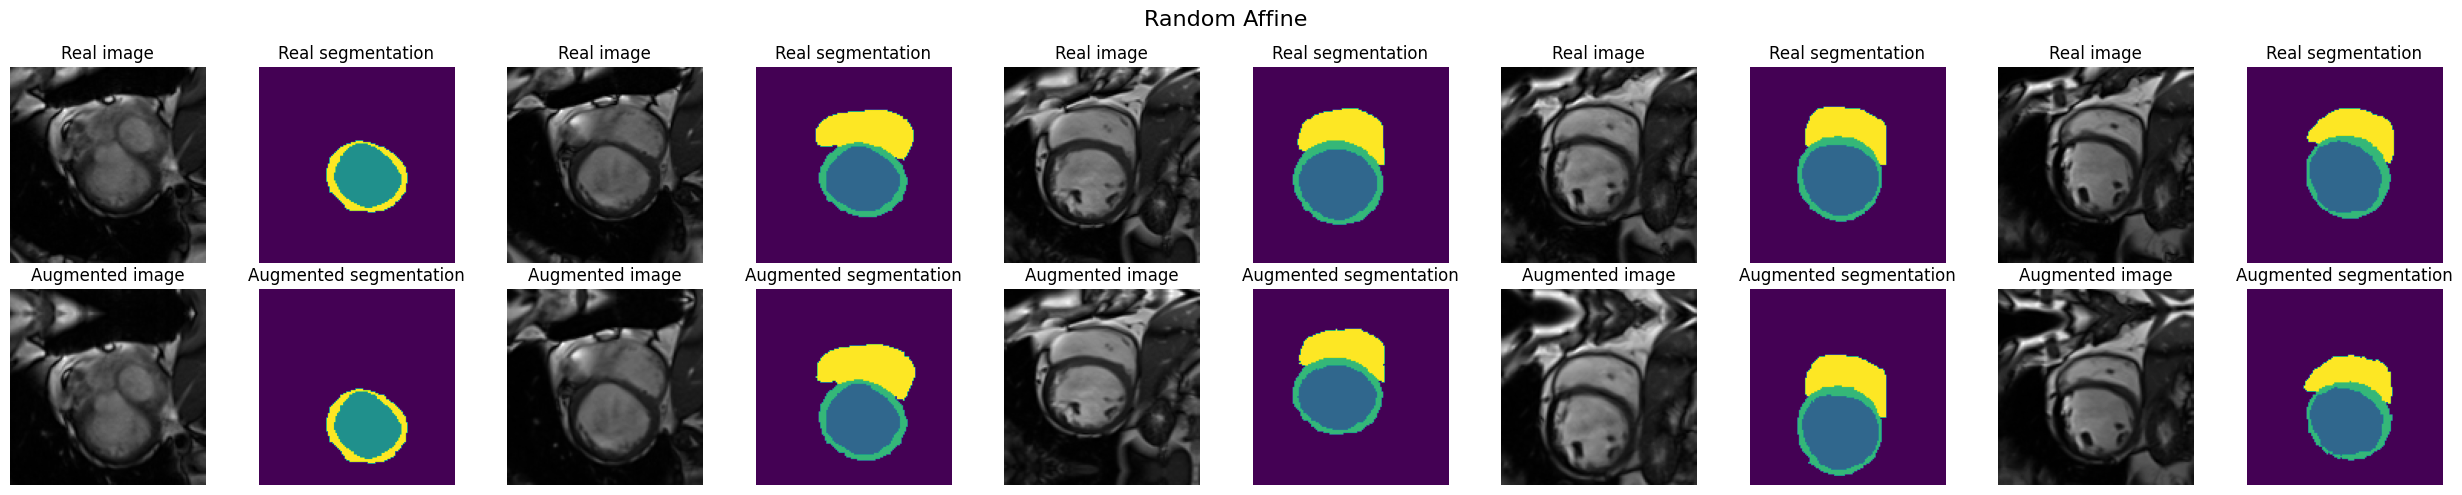

In [138]:
transform = transforms.Compose(
    [        
        transforms.RandAffined(
            keys=["img", "seg"],
            rotate_range=0.3,
            padding_mode="reflection",
            translate_range=20,
            scale_range=0.1,
            mode = ["bilinear", "nearest"],
            prob=1,
        ),
    ]
)

plot_augmentations(images, labels, transform=transform, title="Random Affine", n_examples=5)

**Remarks**
* nearerst not smooth
* bilinear too blurry
* padding mode reflect is better
* always leave scale, no need for a seperate transform

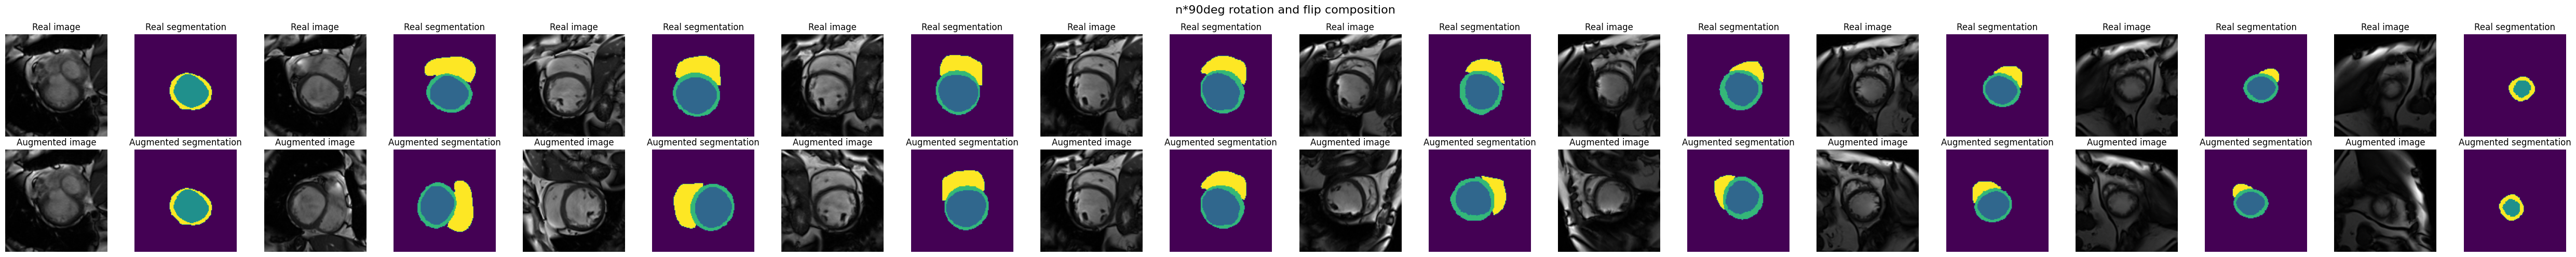

In [120]:
transform = transforms.Compose(
    [        
        transforms.SomeOf(
            [
                transforms.Rotated(keys=["img", "seg"], angle=pi/2, mode="nearest"),
                transforms.Rotated(keys=["img", "seg"], angle=pi, mode="nearest"),                
               
                transforms.RandFlipd(keys=("img", "seg"), prob=0.5, spatial_axis=[1]),
                transforms.RandFlipd(keys=("img", "seg"), prob=0.5, spatial_axis=[0]),
            ], num_transforms=[1, 4]),
    ]
)

plot_augmentations(images, labels, transform=transform, title="n*90deg rotation and flip composition", n_examples=10)

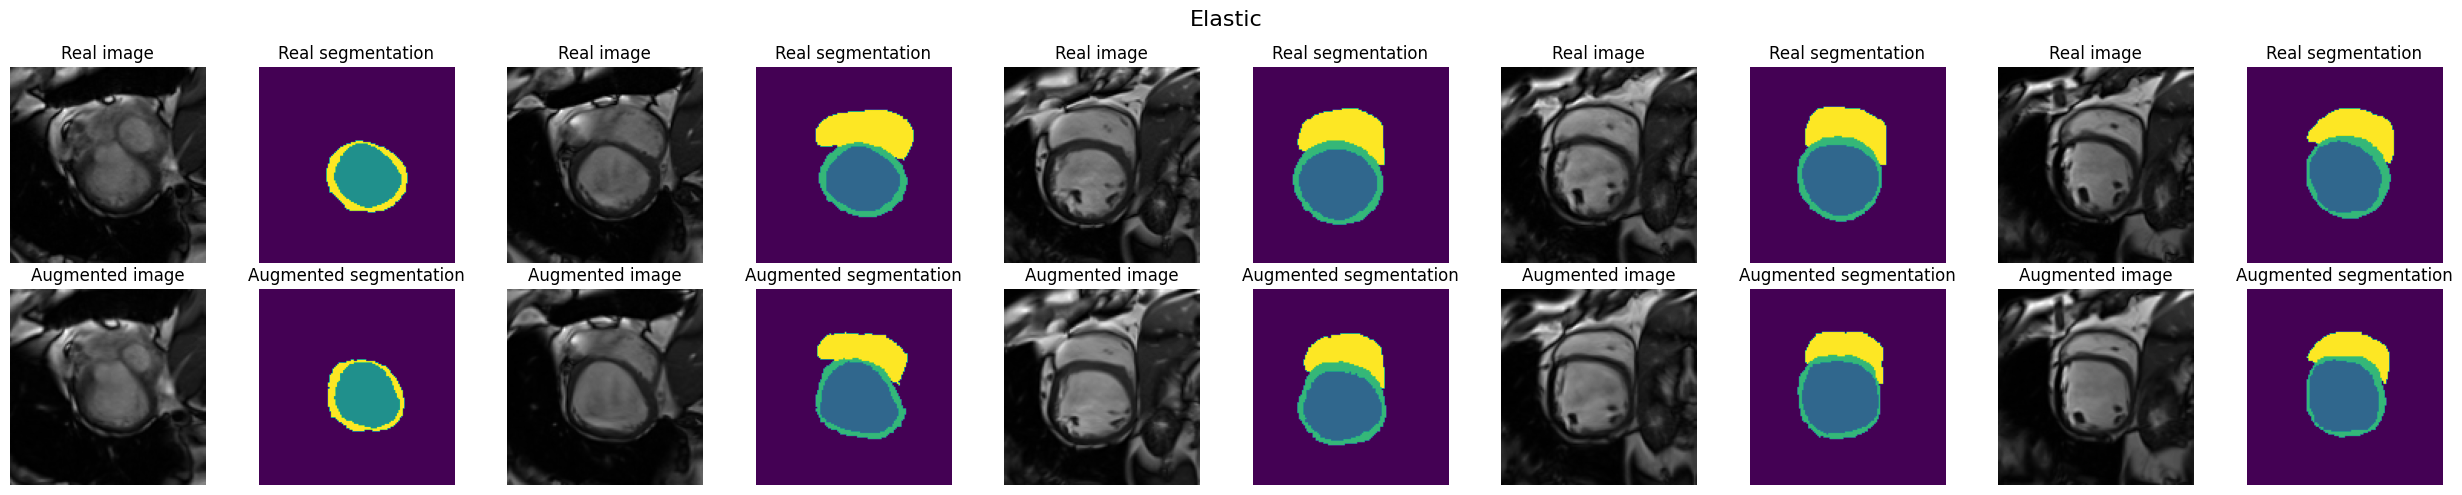

In [93]:
transform = transforms.Compose(
    [        
        transforms.Rand2DElasticd(
            keys=["img", "seg"], prob=1, padding_mode="reflection", magnitude_range=(0, 3), spacing=45, mode=("bilinear", "nearest")),
    ]
)

plot_augmentations(images, labels, transform=transform, title="Elastic" ,n_examples=5)

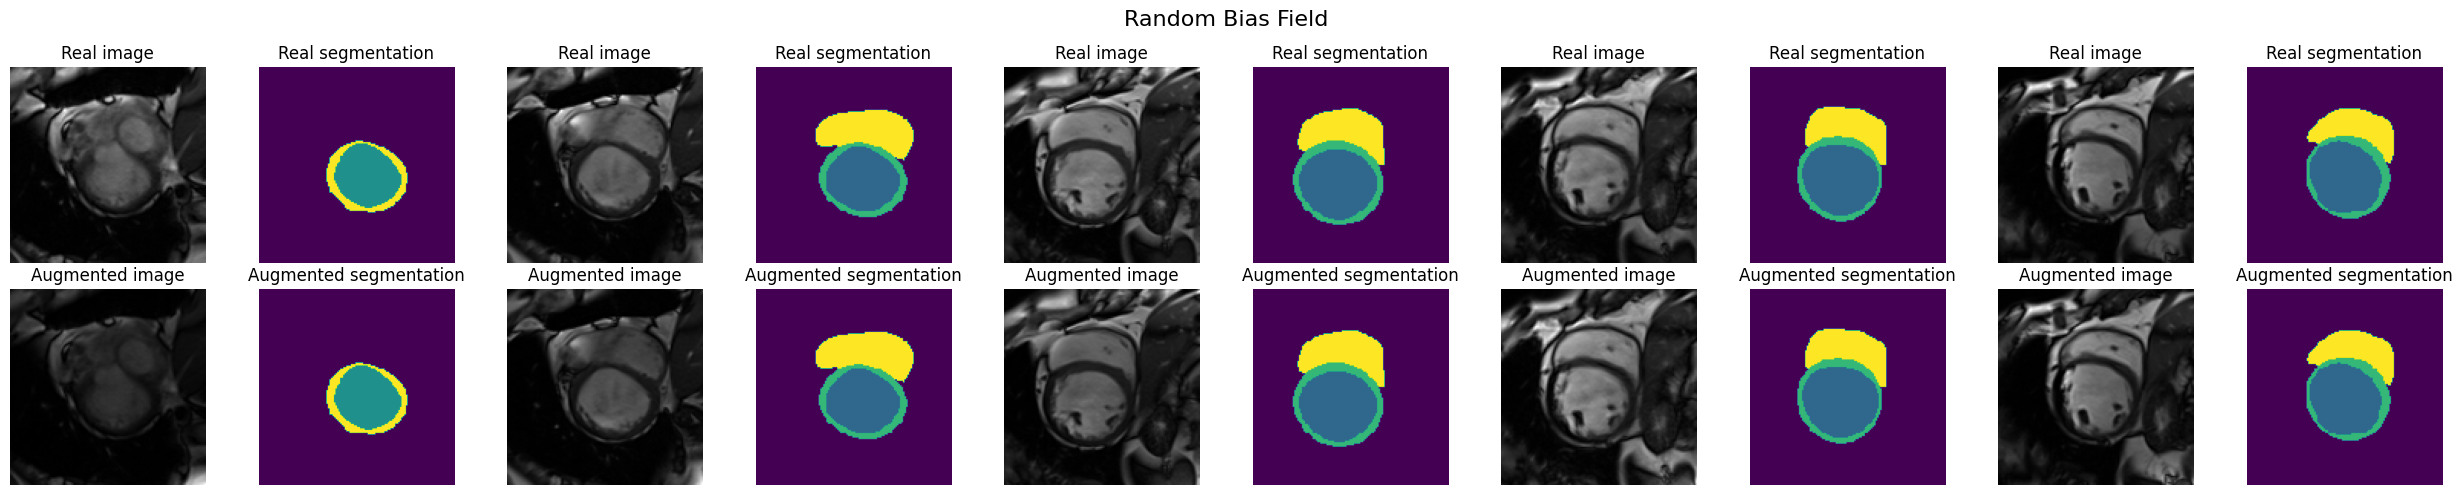

In [103]:
transform = transforms.Compose(
    [        
        transforms.RandBiasFieldd(
            keys=("img", ), prob=1, coeff_range=(0., 0.3))
    ]
)

plot_augmentations(images, labels, transform=transform, title="Random Bias Field" ,n_examples=5)

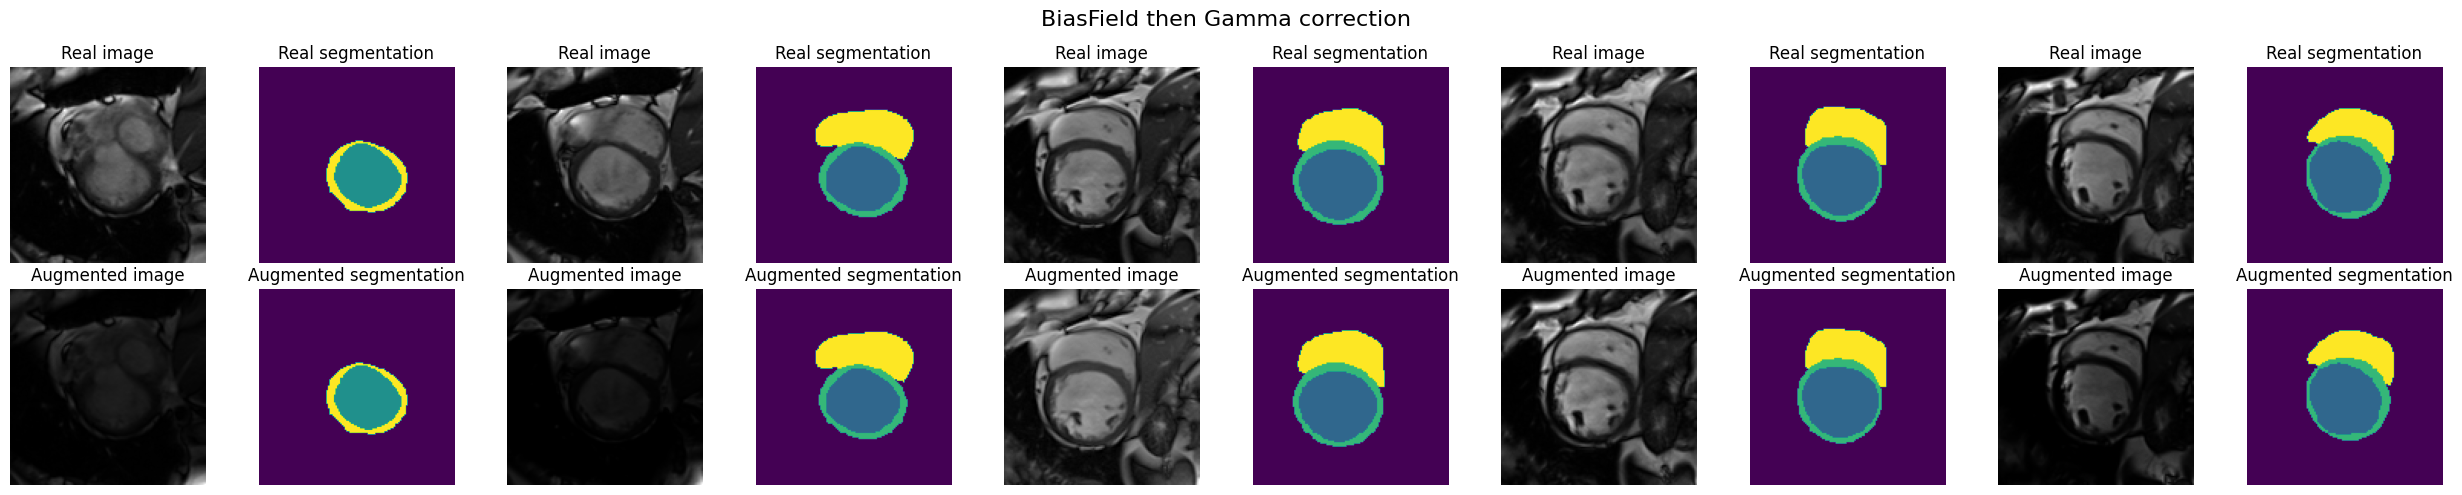

In [133]:
transform = transforms.Compose(
    [
        transforms.RandBiasFieldd(
            keys=("img", ), prob=1, coeff_range=(0., 0.3)),
        transforms.RandAdjustContrastd(
            keys=("img", ), prob=1, gamma=(0.7, 1.5)),
    ]
)

plot_augmentations(images, labels, transform=transform, title="BiasField then Gamma correction" ,n_examples=5)

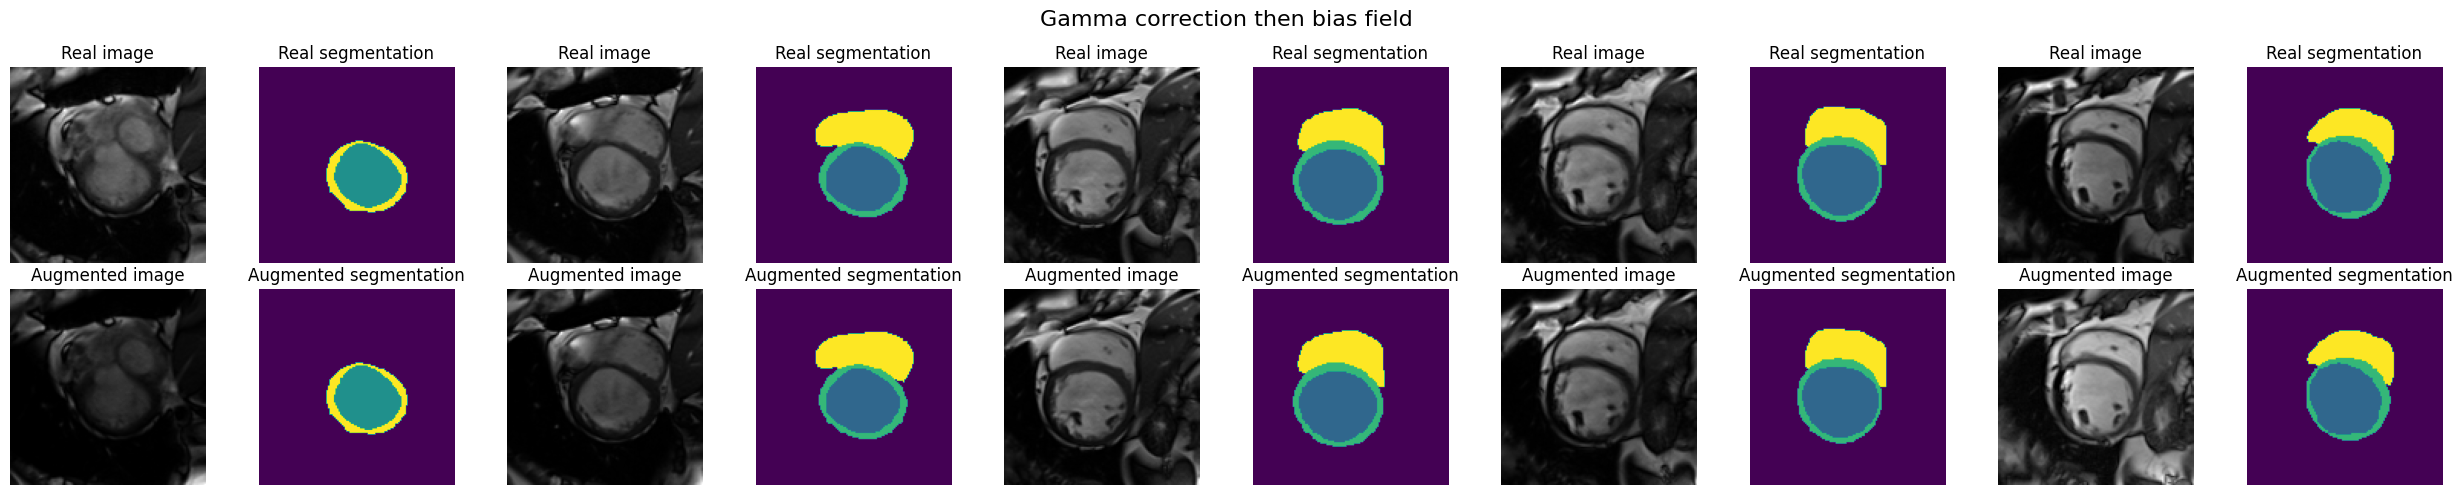

In [134]:
transform = transforms.Compose(
    [
        transforms.RandAdjustContrastd(
            keys=("img", ), prob=1, gamma=(0.7, 1.5)),
        transforms.RandBiasFieldd(
            keys=("img", ), prob=1, coeff_range=(0., 0.3)),

    ]
)

plot_augmentations(images, labels, transform=transform, title="Gamma correction then bias field" ,n_examples=5)

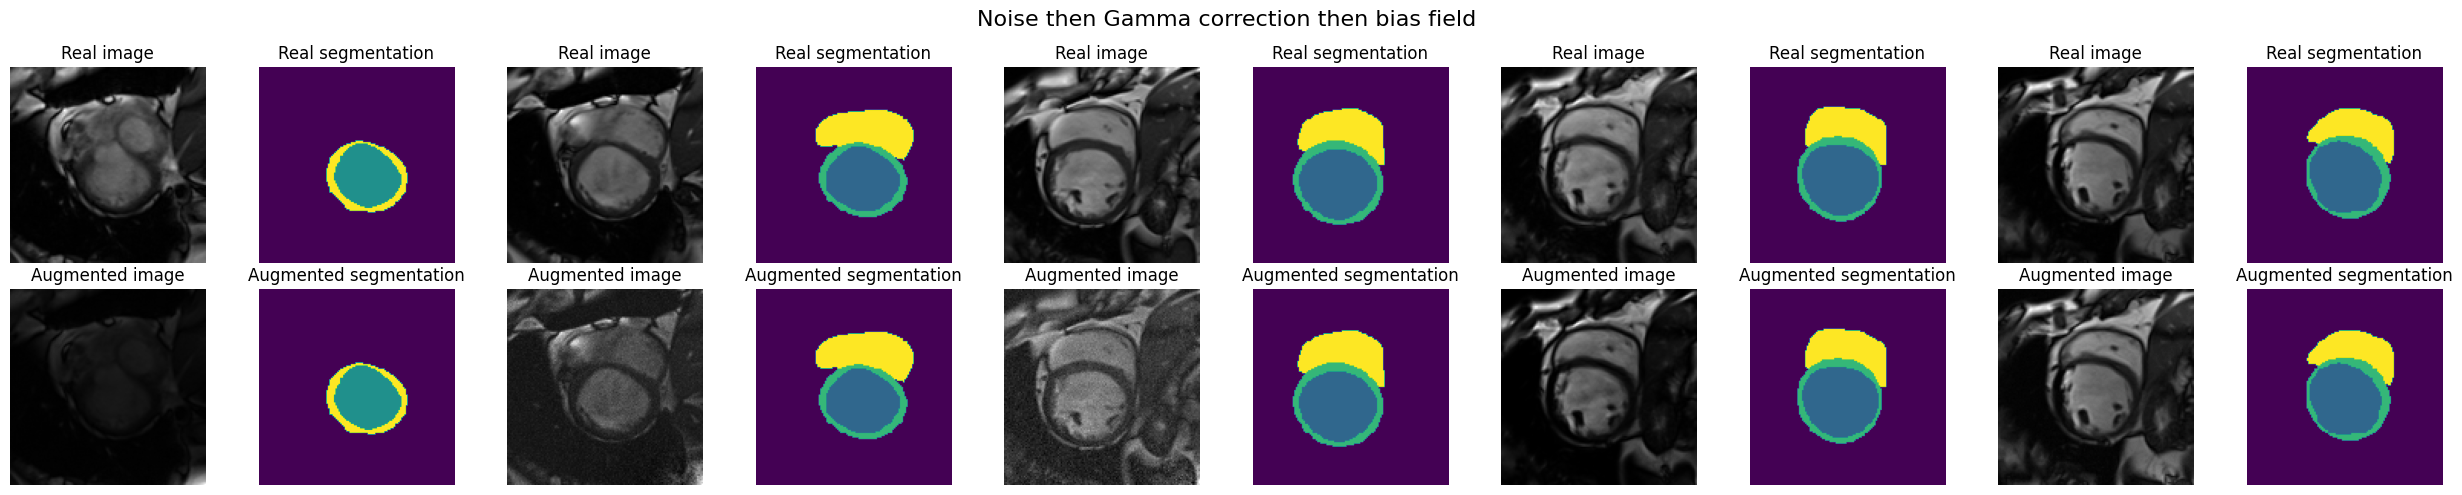

In [135]:
transform = transforms.Compose(
    [
        transforms.RandGaussianNoised(keys=("img", ), prob=1, mean=0., std=0.05),
        transforms.RandAdjustContrastd(
            keys=("img", ), prob=1, gamma=(0.7, 1.5)),
        transforms.RandBiasFieldd(
            keys=("img", ), prob=1, coeff_range=(0., 0.3)),

    ]
)

plot_augmentations(images, labels, transform=transform, title="Noise then Gamma correction then bias field" ,n_examples=5)

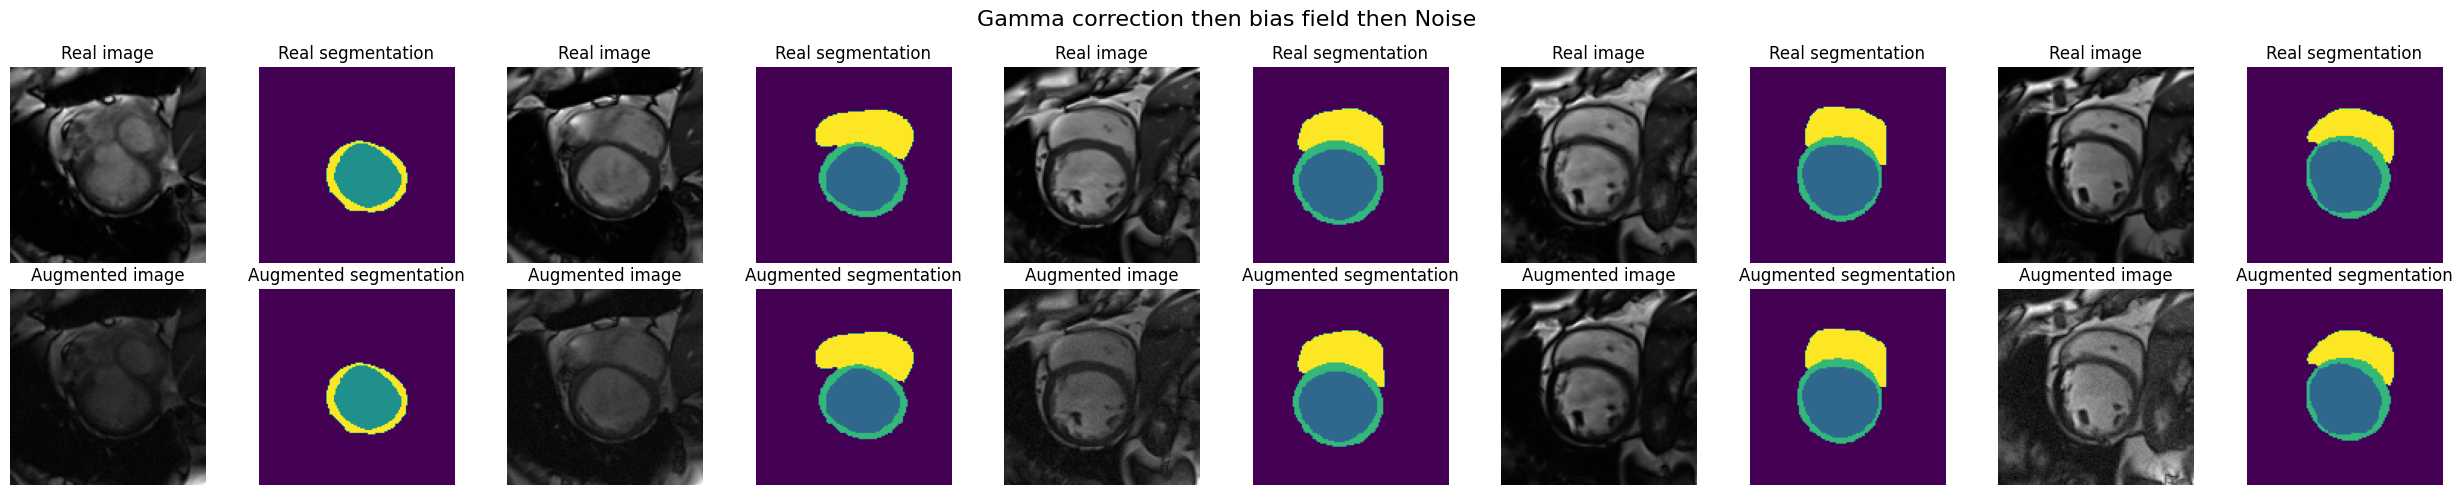

In [137]:
transform = transforms.Compose(
    [
        transforms.RandAdjustContrastd(
            keys=("img", ), prob=1, gamma=(0.7, 1.5)),
        transforms.RandBiasFieldd(
            keys=("img", ), prob=1, coeff_range=(0., 0.3)),
        transforms.RandGaussianNoised(keys=("img", ), prob=1, mean=0., std=0.05),

    ]
)

plot_augmentations(images, labels, transform=transform, title="Gamma correction then bias field then Noise" ,n_examples=5)